In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [26]:
df = pd.read_csv(r'diamonds.csv')

# Overview

In [27]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


1) price: price in US dollars (326 -- 18,823)  
2) carat: weight of the diamond (0.2--5.01)  
3) cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)  
4) color: diamond colour, from J (worst) to D (best)  
5) clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))  
6) x: length in mm (0--10.74)  
7) y: width in mm (0--58.9)  
8) z: depth in mm (0--31.8)  
9) depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  
10) table: width of top of diamond relative to widest point (43--95)  

# Organization of data

### Missing values

In [28]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

No missing values in this dataset

### Mapping categorial data

The features 'cut', 'color' and 'clarity' are categorial. Converting them into numeric data can be useful

In [29]:
print('cut:',df.cut.unique())
print('color:',df.color.unique())
print('clarity:',df.clarity.unique())

cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [30]:
df['cut'] = df['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})
df['color'] = df['color'].map({'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0})
df['clarity']=df['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

In [31]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Analysis

In [9]:
size = ['x', 'y', 'z', 'depth', 'table']
quality =['carat', 'color', 'clarity','cut']

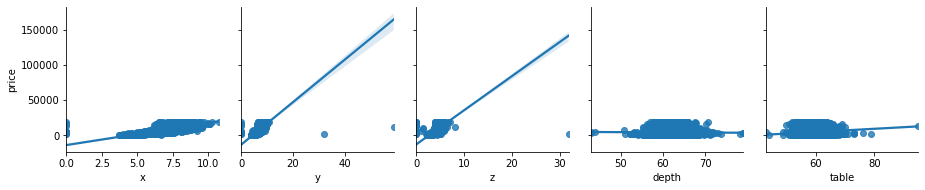

In [352]:
sns.pairplot(data=df, x_vars=size, y_vars='price', kind='reg')
plt.show()

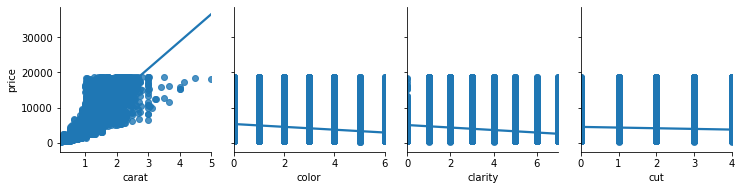

In [353]:
sns.pairplot(data=df, x_vars=quality, y_vars='price', kind='reg')
plt.show()

This is a regression visualization  
This visualisation is not very clear because of the regression function    
But, I can learn from this that there are some outlier diamonds  
For instance there are diamonds that are very underpriced but have huge y,z values  

I need to get rid of these outliers since they can mess up the regression models  
I'll cover each feature manually using scatter graphs for a better grip on the data

In [354]:
size = [df.x, df.y, df.z, df.depth, df.table]
quality =[df.carat, df.color, df.clarity, df.cut]

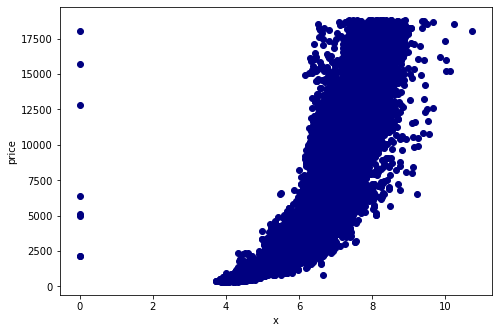

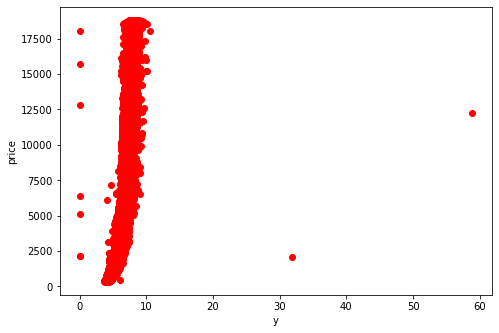

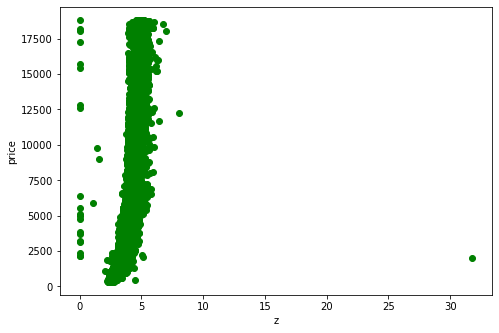

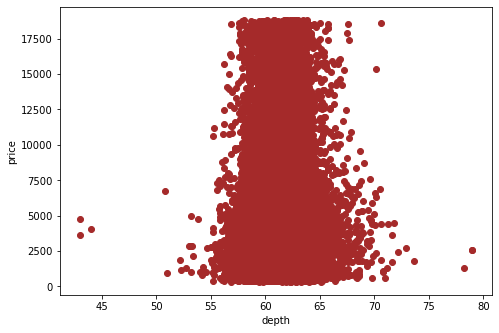

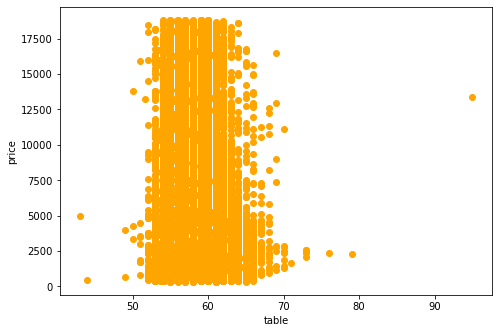

In [355]:
color=['navy','red','green','brown','orange']
for i,j in zip(size,color):
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    plt.scatter(i, df.price, color=j)
    plt.xlabel(i.name)
    plt.ylabel(df.price.name)

The size of a diamond have great influence on it's price  
The slope in each feature of x,y,z is very steep  
The price in depth and table may vary  

At first look its a bit strange that table which is a direct result of x,y,z does not affect the price much  
The explanation: depth = 2 * z / (x + y) which means that when x,y,z get higher values the ratio doesn't change much

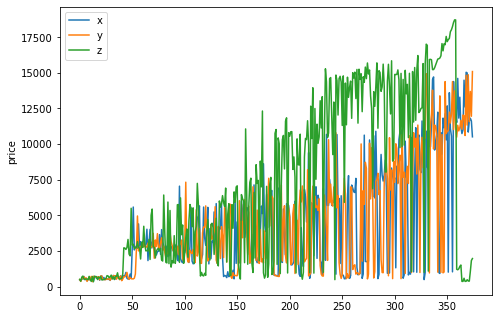

In [356]:
temp1=[]
temp2=[]
temp3=[]
for i,j,k in zip(df.x.unique(),df.y.unique(),df.z.unique()):
    temp1.append(df[df.x==i].price.mean())
    temp2.append(df[df.y==j].price.mean())
    temp3.append(df[df.z==k].price.mean())

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
plt.plot(temp1,label='x')
plt.plot(temp2,label='y')
plt.plot(temp3,label='z')
plt.ylabel('price')
plt.legend()

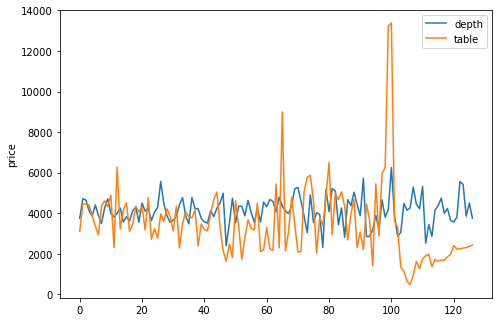

In [357]:
temp1=[]
temp2=[]
for i,j in zip(df.depth.unique(),df.table.unique()):
    temp1.append(df[df.depth==i].price.mean())
    temp2.append(df[df.table==j].price.mean())

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
plt.plot(temp1,label='depth')
plt.plot(temp2,label='table')
plt.ylabel('price')
plt.legend()

### x,y,z

What is the difference between x,y,z values that have the same price? (approximately)

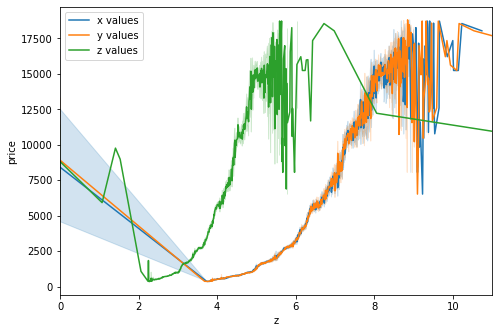

In [358]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
sns.lineplot(x=df.x, y=df.price, label='x values')
sns.lineplot(x=df.y, y=df.price, label='y values')
sns.lineplot(x=df.z, y=df.price, label='z values')
plt.xlim([0, 11])
plt.legend()

The difference between z and x,y is about 1.5-3.5mm, which means z has the biggest effect on the price

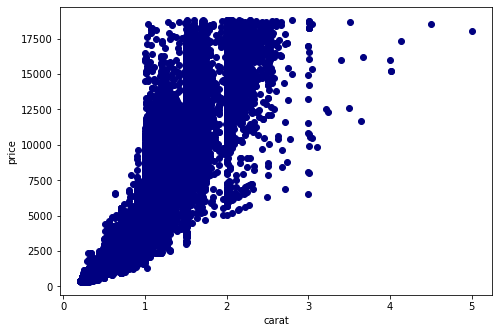

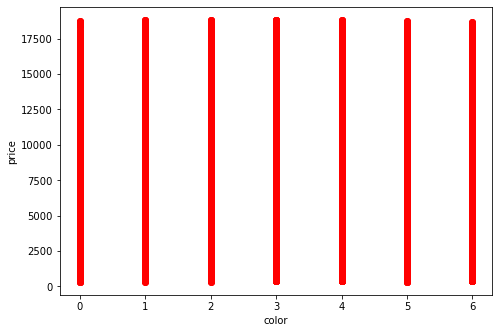

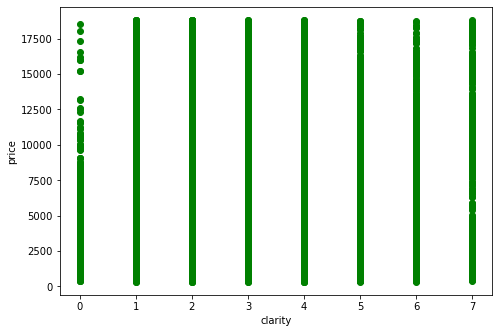

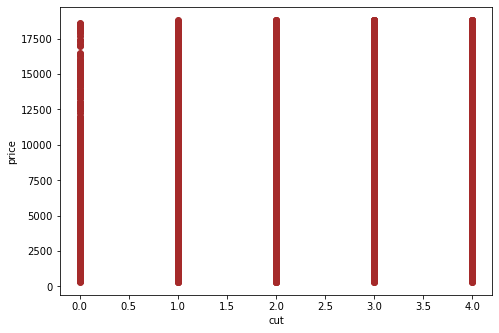

In [359]:
color=['navy','red','green', 'brown']
for i,j in zip(quality,color):
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    plt.scatter(i, df.price, color=j)
    plt.xlabel(i.name)
    plt.ylabel(df.price.name)

The last 3 looks almost like the regression graphs  
Looking back at the regression graphs, it seems that as the color and clarity get better, the price goes down(cut remains stable)  
Lets test that:

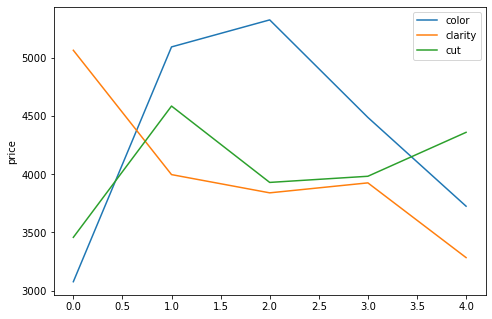

In [360]:
temp1=[]
temp2=[]
temp3=[]
for i,j,k in zip(df.color.unique(),df.clarity.unique(),df.cut.unique()):
    temp1.append(df[df.color==i].price.mean())
    temp2.append(df[df.clarity==j].price.mean())
    temp3.append(df[df.cut==k].price.mean())

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
plt.plot(temp1,label='color')
plt.plot(temp2,label='clarity')
plt.plot(temp3,label='cut')
plt.ylabel('price')
plt.legend()

Strange, but true

### Clarity

Explaination to why the clarity gets better but the price decreases:

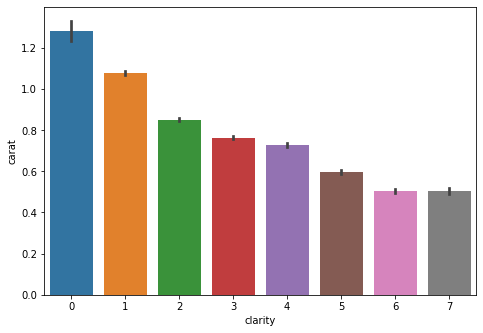

In [361]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
sns.barplot(x=df.clarity, y=df.carat)

According to the scatter and regression graphs of carat, more carat means higher price  
Since the carat decreases as the clarity gets better, we can conclude that it affects the price in a negative way   
Better clarity makes the price go down 

### Color

Explaination to why the color gets better but the price decreases:

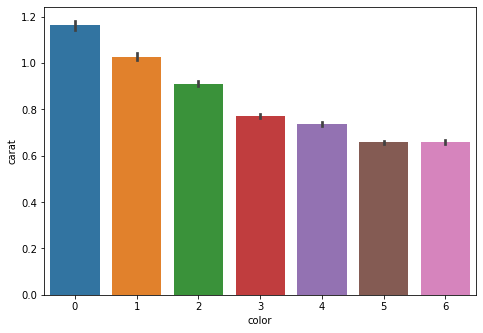

In [362]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
sns.barplot(x=df.color, y=df.carat)

Same explaination here

### Cut

I couldn't find an explanation to why the better the cut the higher the price

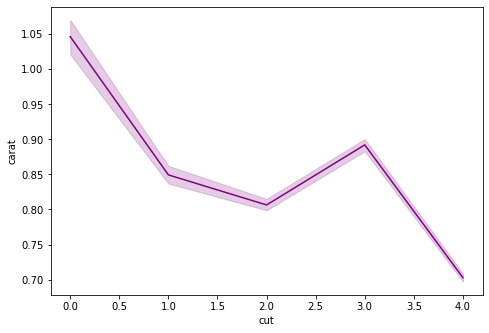

In [363]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
sns.lineplot(x=df.cut, y=df.carat, color='purple')

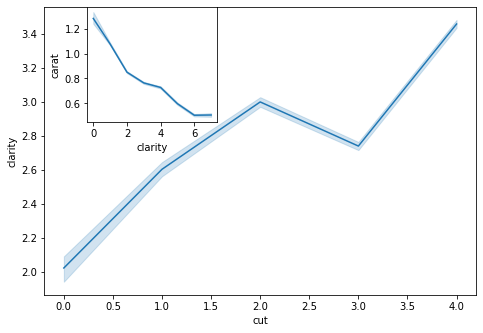

In [364]:
fig2 = plt.figure()
axes_main = fig2.add_axes([0,0,1,1])
sns.lineplot(x=df.cut, y=df.clarity)
axes_inset = fig2.add_axes([0.1,0.6,0.3,0.4])
sns.lineplot(x=df.clarity, y=df.carat)

### Correlation heatmap

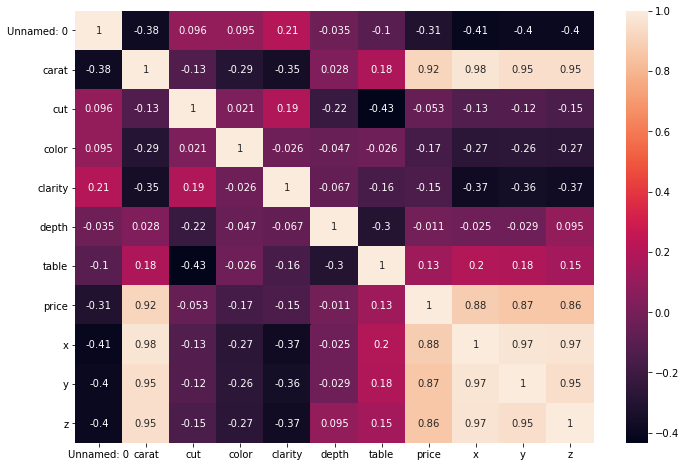

In [538]:
fig = plt.figure()
axes = fig.add_axes([0,0,1.5,1.5])
sns.heatmap(df.corr(),annot=True)

'Unnamed 0' is just another column of indexes so I can remove it safely:

In [35]:
#df = pd.get_dummies(data=df, columns=['cut','color','clarity'])
df = df.drop('Unnamed: 0',axis=1)

In [36]:
print(df.shape)

(53940, 10)


# Building the model

## Regular

In [37]:
X = df.drop('price',axis=1)
y = df.price
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [38]:
print('regular:',X.shape,y.shape)

regular: (53940, 9) (53940,)


### Dummy

In [39]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)

In [40]:
print('MAE:',metrics.mean_absolute_error(y_test,pred_dummy))

MAE: 3020.5058390529985


In [41]:
print('MSE:',metrics.mean_squared_error(y_test,pred_dummy))

MSE: 15897940.683384834


In [42]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_dummy)))

RMSE: 3987.2221763258735


In [43]:
print('Score(R^2):',dummy.score(X_test,y_test))

Score(R^2): -7.04060323410971e-05


### Linear Regression

In [44]:
linreg1 = LinearRegression()
linreg1.fit(X_train,y_train)
pred_linreg1 = linreg1.predict(X_test)

In [45]:
print('MAE:',metrics.mean_absolute_error(y_test,pred_linreg1))

MAE: 805.2743660189825


In [46]:
print('MSE:',metrics.mean_squared_error(y_test,pred_linreg1))

MSE: 1499636.690330459


In [47]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_linreg1)))

RMSE: 1224.5965418579538


In [48]:
print('Score(R^2):',linreg1.score(X_test,y_test))

Score(R^2): 0.9056643685073513


### KNN

Maximum Score: 0.9566014157369214


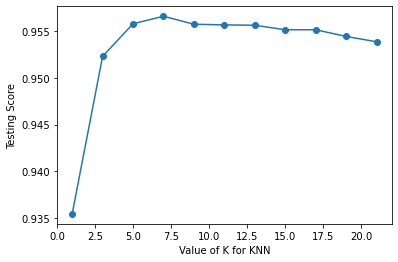

In [23]:
k_range = list(range(1, 22, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

Maximum Score: 0.9628195042779973


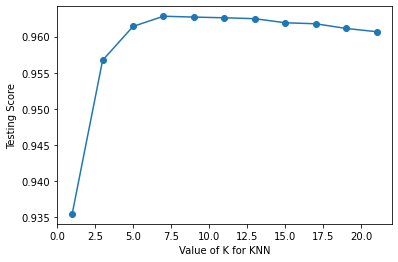

In [24]:
k_range = list(range(1, 22, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

Maximum Score: 0.9723240685547159


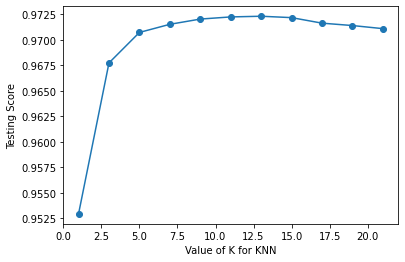

In [25]:
k_range = list(range(1, 22, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='manhattan')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

In [51]:
knn1 = KNeighborsRegressor(n_neighbors=13, weights='distance', metric='manhattan')
knn1.fit(X_train,y_train)
pred_knn1 = knn1.predict(X_test)

In [52]:
print('MAE:',metrics.mean_absolute_error(y_test,pred_knn1))

MAE: 345.5076949202033


In [53]:
print('MSE:',metrics.mean_squared_error(y_test,pred_knn1))

MSE: 439959.3406829834


In [54]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_knn1)))

RMSE: 663.2943092496598


In [55]:
print('Score(R^2):',knn1.score(X_test,y_test))

Score(R^2): 0.9723240685547159


### Decision Tree

In [56]:
for i in [5,50,500,5000]:
    dtr = DecisionTreeRegressor(max_leaf_nodes=i, random_state=0)
    dtr.fit(X_train,y_train)
    #pred_dtr = dtr.predict(X_test)
    print(i,':', dtr.score(X_test,y_test))

5 : 0.8558830757404646
50 : 0.9593147615707177
500 : 0.973627478690307
5000 : 0.9689052823421775


In [57]:
dtr1 = DecisionTreeRegressor(max_leaf_nodes=500, random_state=0)
dtr1.fit(X_train,y_train)
pred_dtr1 = dtr1.predict(X_test)

## After cleaning

In [92]:
df = df[df['x']>2]
df = df[df['y']<20]
df = df[df['y']>2]
df = df[df['z']<10]
df = df[df['z']>2]
df = df[df['depth']>50]
df = df[df['depth']<75]
df = df[df['table']>45]
df = df[df['table']<75]
df = df[df['carat']<=4]

In [37]:
size = ['x', 'y', 'z', 'depth', 'table']
quality =['carat', 'color', 'clarity','cut']

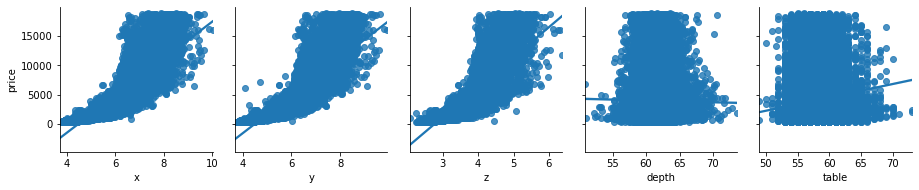

In [38]:
sns.pairplot(data=df, x_vars=size, y_vars='price', kind='reg')
plt.show()

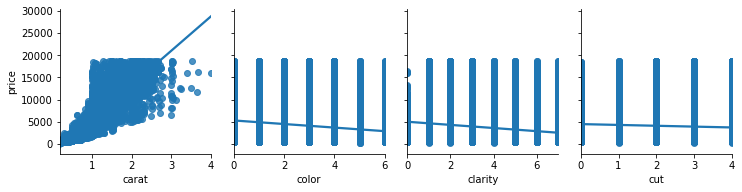

In [39]:
sns.pairplot(data=df, x_vars=quality, y_vars='price', kind='reg')
plt.show()

In [93]:
X = df.drop('price',axis=1)
y = df.price

In [94]:
print('regular:',X.shape,y.shape)

regular: (53898, 9) (53898,)


In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

### Linear Regression

In [43]:
linreg2 = LinearRegression()
linreg2.fit(X_train,y_train)
pred_linreg2 = linreg2.predict(X_test)

In [44]:
print('MAE:',metrics.mean_absolute_error(y_test,pred_linreg2))

MAE: 780.3845747368304


In [45]:
print('MSE:',metrics.mean_squared_error(y_test,pred_linreg2))

MSE: 1407310.4767866072


In [46]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_linreg2)))

RMSE: 1186.3011745701879


In [47]:
print('Score(R^2):',linreg2.score(X_test,y_test))

Score(R^2): 0.907204660188289


### KNN

Maximum Score: 0.9535808258650408


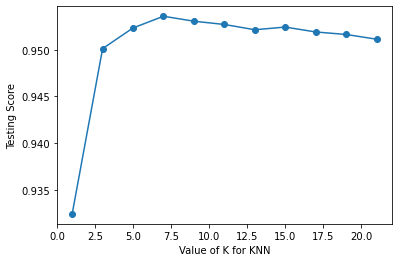

In [48]:
k_range = list(range(1, 22, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

Maximum Score: 0.9595695434523582


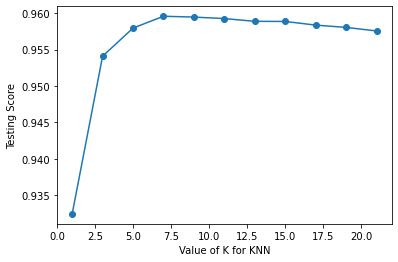

In [49]:
k_range = list(range(1, 22, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

Maximum Score: 0.9694952307876491


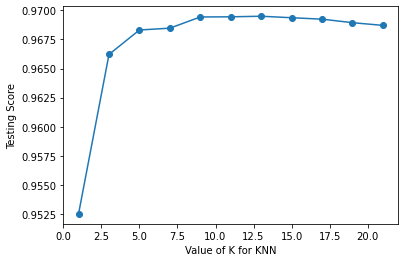

In [50]:
k_range = list(range(1, 22, 2))
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='manhattan')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Score')
print('Maximum Score:',np.array(scores).max())

In [51]:
knn2 = KNeighborsRegressor(n_neighbors=13, weights='distance', metric='manhattan')
knn2.fit(X_train,y_train)
pred_knn2 = knn2.predict(X_test)

In [52]:
print('MAE:',metrics.mean_absolute_error(y_test,pred_knn2))

MAE: 344.65700881085104


In [53]:
print('MSE:',metrics.mean_squared_error(y_test,pred_knn2))

MSE: 462627.5564226248


In [54]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_knn2)))

RMSE: 680.1673003185501


In [55]:
print('Score(R^2):',knn2.score(X_test,y_test))

Score(R^2): 0.9694952307876491


### Decision Tree

In [56]:
for i in [5,50,500,5000]:
    dtr = DecisionTreeRegressor(max_leaf_nodes=i, random_state=0)
    dtr.fit(X_train,y_train)
    #pred_dtr = dtr.predict(X_test)
    print(i,':', dtr.score(X_test,y_test))

5 : 0.8498717991612543
50 : 0.9570172270572805
500 : 0.9726837411490143
5000 : 0.9663332395373272


In [57]:
dtr2 = DecisionTreeRegressor(max_leaf_nodes=500, random_state=0)
dtr2.fit(X_train,y_train)
pred_dtr2 = dtr2.predict(X_test)

# Best Model

In [58]:
cross_val_score(linreg1,X=X_train,y=y_train,cv=10).mean()

0.9108850901915864

In [59]:
cross_val_score(knn1,X=X_train,y=y_train,cv=10).mean()

0.9713522768174595

In [60]:
cross_val_score(dtr1,X=X_train,y=y_train,cv=10).mean()

0.9721149577986254

In [99]:
df = pd.read_csv(r'diamonds.csv')
df = df.drop('Unnamed: 0',axis=1)

df['cut'] = df['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})
df['color'] = df['color'].map({'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0})
df['clarity']=df['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

X = df.drop('price',axis=1)
y = df.price

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [100]:
dtr1 = DecisionTreeRegressor(max_leaf_nodes=500, random_state=0)
dtr1.fit(X_train,y_train)
pred_dtr1 = dtr1.predict(X_test)

In [101]:
dtr1.score(X_test,y_test)

0.973627478690307

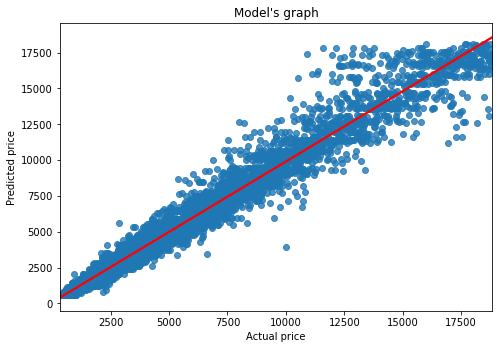

In [102]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
sns.regplot(x=y_test, y=pred_dtr1, line_kws={'color':'red'})
plt.ylabel('Predicted price')
plt.xlabel('Actual price')
plt.title('Model\'s graph')
plt.show()